In [33]:
!pip install ace_tools

In [38]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [36]:
file_path_new = './healthcare_dataset.csv'
healthcare_data = pd.read_csv(file_path_new)

healthcare_data.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,30,Male,B-,Cancer,31/01/2024,Blue Cross,18.856.300.000.000.000,328,Urgent,02/02/2024,Paracetamol,Normal
1,62,Male,A+,Obesity,20/08/2019,Medicare,33.643.300.000.000.000,265,Emergency,26/08/2019,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,22/09/2022,Aetna,27.955.100.000.000.000,205,Emergency,07/10/2022,Aspirin,Normal
3,28,Female,O+,Diabetes,18/11/2020,Medicare,3.790.980.000.000.000,450,Elective,18/12/2020,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,19/09/2022,Aetna,14.238.300.000.000.000,458,Urgent,09/10/2022,Penicillin,Abnormal


In [37]:
# Corrigir nome da coluna e formatar para análises
healthcare_data.rename(columns={' Billing Amount ': 'Billing Amount'}, inplace=True)
healthcare_data['Billing Amount'] = healthcare_data['Billing Amount'].str.replace('.', '', regex=False).astype(float)

# Selecionar as colunas numéricas para análise
numeric_healthcare_data = healthcare_data.select_dtypes(include=[np.number])

# Recalcular as estatísticas, correlação e escores Z
healthcare_statistics = {
    "Média": numeric_healthcare_data.mean(),
    "Desvio Padrão": numeric_healthcare_data.std(),
    "Valor Mínimo": numeric_healthcare_data.min(),
    "Valor Máximo": numeric_healthcare_data.max(),
    "1º Quartil": numeric_healthcare_data.quantile(0.25),
    "Mediana (2º Quartil)": numeric_healthcare_data.quantile(0.5),
    "3º Quartil": numeric_healthcare_data.quantile(0.75)
}

healthcare_correlation_matrix = numeric_healthcare_data.corr()
healthcare_z_scores = numeric_healthcare_data.apply(zscore)

healthcare_statistics_df = pd.DataFrame(healthcare_statistics)

# Exibir as estatísticas descritivas
print("Estatísticas Descritivas dos Dados de Saúde:")
print(healthcare_statistics_df)

# Exibir a matriz de correlação
print("\nMatriz de Correlação dos Dados de Saúde:")
print(healthcare_correlation_matrix)

# Exibir os primeiros 5 valores do Escore Z
print("\nEscore Z dos Dados de Saúde (primeiros 5 registros):")
print(healthcare_z_scores.head())

healthcare_statistics_df, healthcare_correlation_matrix, healthcare_z_scores.head()

Estatísticas Descritivas dos Dados de Saúde:
                       Média  Desvio Padrão  Valor Mínimo  Valor Máximo  \
Age             5.153946e+01   1.960245e+01  1.300000e+01  8.900000e+01   
Billing Amount  1.400204e+16   1.376901e+16 -5.025080e+16  8.168430e+16   
Room Number     3.011348e+02   1.152431e+02  1.010000e+02  5.000000e+02   

                  1º Quartil  Mediana (2º Quartil)    3º Quartil  
Age             3.500000e+01          5.200000e+01  6.800000e+01  
Billing Amount  3.612980e+15          7.542275e+15  2.306782e+16  
Room Number     2.020000e+02          3.020000e+02  4.010000e+02  

Matriz de Correlação dos Dados de Saúde:
                     Age  Billing Amount  Room Number
Age             1.000000        0.001433    -0.000720
Billing Amount  0.001433        1.000000    -0.001557
Room Number    -0.000720       -0.001557     1.000000

Escore Z dos Dados de Saúde (primeiros 5 registros):
        Age  Billing Amount  Room Number
0 -1.098824        0.352553     0

(                       Média  Desvio Padrão  Valor Mínimo  Valor Máximo  \
 Age             5.153946e+01   1.960245e+01  1.300000e+01  8.900000e+01   
 Billing Amount  1.400204e+16   1.376901e+16 -5.025080e+16  8.168430e+16   
 Room Number     3.011348e+02   1.152431e+02  1.010000e+02  5.000000e+02   
 
                   1º Quartil  Mediana (2º Quartil)    3º Quartil  
 Age             3.500000e+01          5.200000e+01  6.800000e+01  
 Billing Amount  3.612980e+15          7.542275e+15  2.306782e+16  
 Room Number     2.020000e+02          3.020000e+02  4.010000e+02  ,
                      Age  Billing Amount  Room Number
 Age             1.000000        0.001433    -0.000720
 Billing Amount  0.001433        1.000000    -0.001557
 Room Number    -0.000720       -0.001557     1.000000,
         Age  Billing Amount  Room Number
 0 -1.098824        0.352553     0.233120
 1  0.533639        1.426496    -0.313556
 2  1.247842        1.013376    -0.834199
 3 -1.200853       -0.741604    

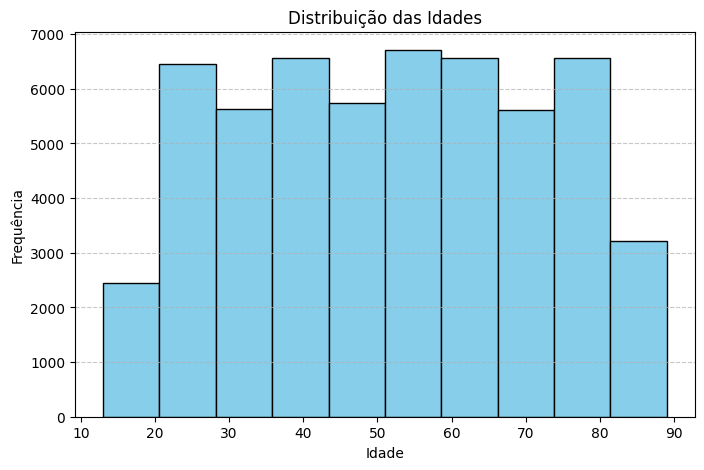

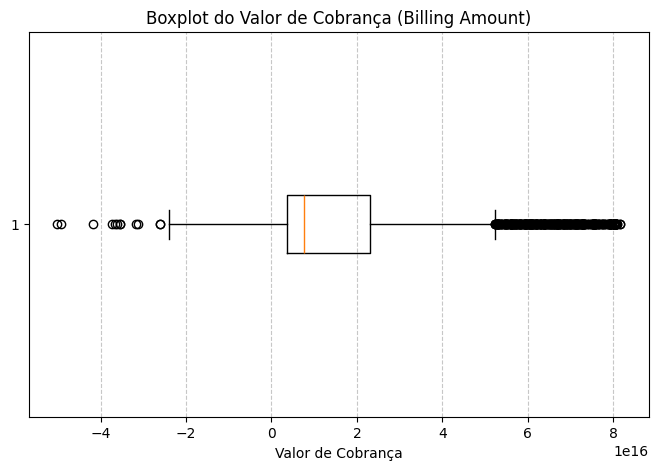

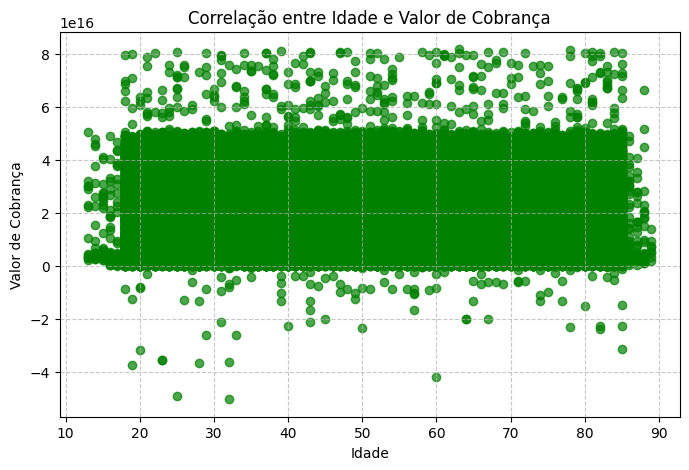

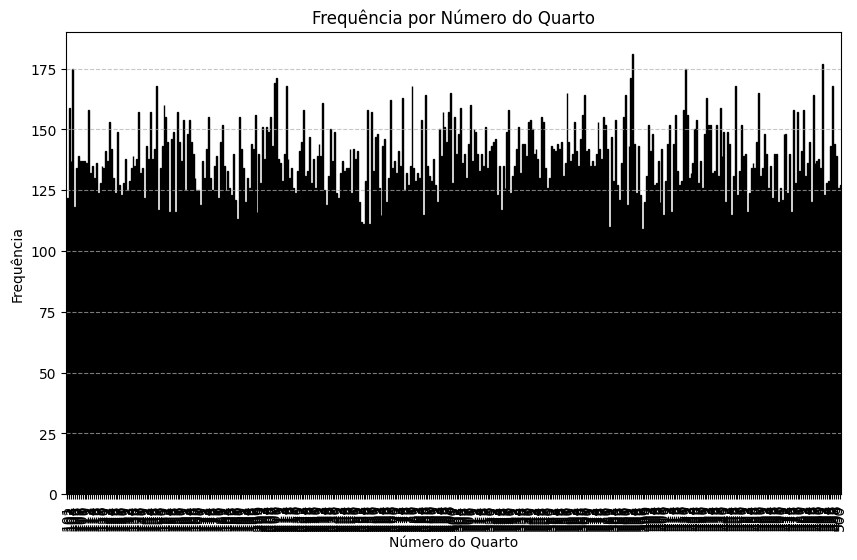

In [39]:
# Gráfico 1: Distribuição das idades
plt.figure(figsize=(8, 5))
plt.hist(healthcare_data['Age'], bins=10, edgecolor='black', color='skyblue')
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico 2: Boxplot de "Billing Amount"
plt.figure(figsize=(8, 5))
plt.boxplot(healthcare_data['Billing Amount'], vert=False)
plt.title('Boxplot do Valor de Cobrança (Billing Amount)')
plt.xlabel('Valor de Cobrança')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Gráfico 3: Correlação entre Idade e Valor de Cobrança
plt.figure(figsize=(8, 5))
plt.scatter(healthcare_data['Age'], healthcare_data['Billing Amount'], alpha=0.7, color='green')
plt.title('Correlação entre Idade e Valor de Cobrança')
plt.xlabel('Idade')
plt.ylabel('Valor de Cobrança')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# Gráfico 4: Frequência por Número do Quarto
plt.figure(figsize=(10, 6))
healthcare_data['Room Number'].value_counts().sort_index().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Frequência por Número do Quarto')
plt.xlabel('Número do Quarto')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()